# 3.1 Hello World

# 3.1 Hello 텐서플로 2.0

In [1]:
import tensorflow as tf
from IPython.display import Image


In [2]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.8.0


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [3]:
# 3.7 랜덤한 수 얻기 (균일 분포) : 갯수, 시작범위~종료 범위
# shape = [1]을 했기에 1개의 균일 분포 난수를 얻게 됨.
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.27960598], shape=(1,), dtype=float32)


In [4]:
# 3.7 랜덤한 수 얻기 (균일 분포) : 갯수, 시작범위~종료 범위
# shape = [14]을 했기에 1개의 균일 분포 난수를 얻게 됨.
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.5344347  0.28231502 0.67059135 0.14055717], shape=(4,), dtype=float32)


In [5]:
# 참고) 랜덤한 수 얻기 (균일 분포) : 갯수, 시작범위~종료 범위 --> 범위를 변경을 하게 되면 값이 변경된다!!!
rand = tf.random.uniform([1],1,10)
print(rand)

tf.Tensor([3.5114338], shape=(1,), dtype=float32)


In [6]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.33290267 0.21471834 0.04340172 0.19649935], shape=(4,), dtype=float32)


In [7]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.30716166  0.7863322   0.2273071   0.83064026], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

<img src="https://drive.google.com/uc?id=1BBi6zoSnIZnnlilKabNvK6fdnDd_G7BB">

In [8]:
# 3.10 sigmoid 함수
import math

def sigmoid(x):
    return 1 /(1 + math.exp(-x))


In [9]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
# 가중치는 1개가 필요 & 0~1 사이의 정규 분포에서 랜덤하게 1개
w = tf.random.normal([1], 0, 1)
# 입력의 선형 결합 & Activation Function
output = sigmoid(x * w)
print(output)

0.3876287606715893


In [10]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
# lr = 0.1
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.09316942206577435 0.09316942206577435
199 -0.04977386582860129 0.04977386582860129
299 -0.03366703972066176 0.03366703972066176
399 -0.025364544295251246 0.025364544295251246
499 -0.020321324235711827 0.020321324235711827
599 -0.01693968613156213 0.01693968613156213
699 -0.014517182977708487 0.014517182977708487
799 -0.012697666602791476 0.012697666602791476
899 -0.011281444843768052 0.011281444843768052
999 -0.010148224339545556 0.010148224339545556


In [11]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
# lr = 0.8 -> 더 빨리 도달하기는 함..
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.8 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.005634377763949584 0.005634377763949584
199 -0.0038871565074913342 0.0038871565074913342
299 -0.002966517380618932 0.002966517380618932
399 -0.0023982682317388614 0.0023982682317388614
499 -0.002012629889799897 0.002012629889799897
599 -0.0017337870291468118 0.0017337870291468118
699 -0.0015227789633783198 0.0015227789633783198
799 -0.0013575410063044527 0.0013575410063044527
899 -0.0012246420811867578 0.0012246420811867578
999 -0.0011154355374832089 0.0011154355374832089


* 아래 결과에 주의!!!) 학습이 이루어지지 않고 있으며, 이에 대한 것은 입력값 X=0이기 때문에 변화가 발생하지 않음!!!---> 이러한 것을 방지하고자 Bias에 특정한 값을 넣어주게 된다!!!

In [12]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
# --> 주의!!!) 아래의 경우는 입력 X=0이기 때문에 전혀 변화가 없음
# ------> 학습이 전혀 이루어지지 않음!!!!
# ------> 이러한 일을 방지하고자 Bias를 넣어주게 된다!!!!!!!!
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


<img src="https://drive.google.com/uc?id=17CLsc3B2hKgnsYRjJcrQv4l-pPV248cc">

In [94]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
#---> bias 추가함!!!
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.11657769079860292 0.8834223092013971
199 0.05612481815603265 0.9438751818439673
299 0.03651176098757969 0.9634882390124203
399 0.026961060417535876 0.9730389395824641
499 0.021338988024194983 0.978661011975805
599 0.01764348815718486 0.9823565118428151
699 0.015032296645367649 0.9849677033546324
799 0.013090704924809793 0.9869092950751902
899 0.011591126866964174 0.9884088731330358
999 0.010398402629283376 0.9896015973707166


## 3.3.3 첫번째 신경망 네트워크 : AND

<img src="https://drive.google.com/uc?id=1W8XBEYBrhPa1jCuwekU64KIng2tz8v8C">

In [14]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [16]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
x

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 0]])

In [17]:
# x의 처음 원소에 대한 접근 방식!!!
x[0]

array([1, 1])

<img src="https://drive.google.com/uc?id=1ANkraia9jGZhM_sRAGlEzNxazDKJn0Iw">

In [18]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
# -> 위의 AND 논리표를 참조하여 아래와 같이 x,y 설정
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
# -> bais와 그에 대한 계수
b = tf.random.normal([1], 0, 1)
b_x = 1
# 가중치
w = tf.random.normal([2], 0, 1)

# --> 수행을 하면, 에러가 점차 줄어들고 있음!!
for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]* w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.10551498650285131
399 -0.06398357116141522
599 -0.04578883945898911
799 -0.03555089468171649
999 -0.02900275103657975
1199 -0.024464312931631024
1399 -0.021138356596256368
1599 -0.018598596510113644
1799 -0.016598175099486794
1999 -0.014981543434513763


In [19]:
# 3.17 파이썬에서 리스트에 정수를 곱하기

# 대상) 쌩 파이썬의 리스트!!!!!
# 결과 주의!!!!) 파이썬의 리스트의 경우에는 결과 값이 양의 정수인 경우 --> 그 만큼 복사!!!
#                      양의 소수인 경우에는 ---> 에러!!!!
#                       0이하인 수는 ----> 빈 리스트!!!!
print([1,2,3]*2)
# print([1,2,3]*1.3)

print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [20]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
# --> 쌩 파이썬에서 실수를 곱하면 에러 출력!!!!!
# 결론) 쌩 파이썬의 리스트에는 실수를 곱할 수 없음!!!
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [21]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기

# NumPy-->벡터 연산으로 모든 원소에 일괄 적용!!!!!!---> 파이썬의 리스트와 크게 다른 사항임!!!!!
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [22]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print("X", x[i], "Y", y[i], "Output", sigmoid(np.sum(x[j]* w) + b_x * b))

X [1 1] Y [1] Output 2.3483719327185614e-05
X [1 0] Y [0] Output 2.3483719327185614e-05
X [0 1] Y [0] Output 2.3483719327185614e-05
X [0 0] Y [0] Output 2.3483719327185614e-05


## 3.3.4 두번째 신경망 네트워크 : OR ---> 잘 보면 내부적인 구조의 변화는 없음!!! 다만 입력/출력만 or로 변경이 되었음!!!!

<img src="https://drive.google.com/uc?id=1F7CQz1CHAHnAxz6N-aRliLZgBDkOXAg1">

In [23]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([ [1,1], [1,0], [1,0], [0,1], [0,0]])
y = np.array([ [1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

# -> 수행을 하면 오차가 줄어드는 모습을 보임.
for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.01623560745805458
399 -0.009473091671901704
599 -0.006713991984895501
799 -0.005209022814427099
999 -0.004259958547431192
1199 -0.0036060752038529417
1399 -0.00312765875999416
1599 -0.0027624458557978984
1799 -0.002474244195636738
1999 -0.002241018331628604


In [24]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.990659229945076
X: [1 0] Y: [1] Output: 0.9997629187223024
X: [1 0] Y: [1] Output: 0.9997629187223024
X: [0 1] Y: [0] Output: 0.012031217369544621


## 3.3.5 세번째 신경망 네트워크 : XOR

<img src="https://drive.google.com/uc?id=1pVnOzv08DalsgDkip5Ka-rt0zy8rPo64">

In [25]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([ [1,1], [1,0], [1,0], [0,1], [0,0]])
y = np.array([ [0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

## --> 결과를 보면 일단 오차는 줄어드는데....
##     과연 학습이 잘 되는 것일까???????
for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.019650275901264495
399 0.010789230971746775
599 0.007437314190525439
799 0.005678320151333203
999 0.004594516606460173
1199 0.003859569674843357
1399 0.0033282338047455795
1599 0.002926096361115451
1799 0.002611023654073029
1999 0.0023575180143460012


In [26]:
# 3.24 XOR 네트워크의 평가
# ----> 학습이 망;;;;ㅠㅠ
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.00968932317688234
X: [1 0] Y: [1] Output: 0.993841552717348
X: [1 0] Y: [1] Output: 0.993841552717348
X: [0 1] Y: [0] Output: 0.0002875907060571607


### 중요!!!) 그래서 계수들을 보면 AND의 경우에는 차이가 발생들을 하고 있으나, XOR의 경우에는 거의 엇비슷한 값을 가지고 있다 ---> 이것으로 단순한 NN으로는 XOR을 해결할 수 없음에 대한 1번 시련이 옴!!!

In [27]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([ 3.5266902 -9.710748 ], shape=(2,), dtype=float32)
b: tf.Tensor([1.5570629], shape=(1,), dtype=float32)


In [28]:
# 위와 같이 학습이 잘 안된 결과를 확인을 위해서 보니~
# 중간의 계산의 값이 거의 0에 가깝게 되기 때문에
# sigmoid의 성질 상 0.5의 중간값 주변의 값들이 나온다;;ㅠㅠㅠ
for i in range(4):
    print("x1", x[i][0], "x2",x[i][1], "Real y",y[i],"중간계산",np.sum(x[i]*w)+b_x*b,"출력", sigmoid(np.sum(x[i]*w)+b_x*b))

x1 1 x2 1 Real y [0] 중간계산 tf.Tensor([-4.626994], shape=(1,), dtype=float32) 출력 0.00968932317688234
x1 1 x2 0 Real y [1] 중간계산 tf.Tensor([5.083753], shape=(1,), dtype=float32) 출력 0.993841552717348
x1 1 x2 0 Real y [1] 중간계산 tf.Tensor([5.083753], shape=(1,), dtype=float32) 출력 0.993841552717348
x1 0 x2 1 Real y [0] 중간계산 tf.Tensor([-8.153685], shape=(1,), dtype=float32) 출력 0.0002875907060571607


In [29]:
# 그러면 위에서 제대로 동작한 AND를 다시 불러와서 AND는 중간에 값이 어떤지 보자~~
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
# -> 위의 AND 논리표를 참조하여 아래와 같이 x,y 설정
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
# -> bais와 그에 대한 계수
b = tf.random.normal([1],0,1)
b_x = 1
# 가중치
w = tf.random.normal([2],0,1)

# --> 수행을 하면, 에러가 점차 줄어들고 있음!!
for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)
print("------------AND Network 중간 --------------------")
### --> XOR에 비해서 중간에 다양한 값이 나와서 결과도 괜찮음!!!
for i in range(4):
    print("x1", x[i][0], "x2",x[i][1], "Real y",y[i],"중간계산",np.sum(x[i]*w)+b_x*b,"출력", sigmoid(np.sum(x[i]*w)+b_x*b))

199 -0.10757664141134962
399 -0.06474864747367913
599 -0.04618481208925798
799 -0.03579167495344071
999 -0.029164177127794025
1199 -0.024579425346398086
1399 -0.021225089073221393
1599 -0.018665585705027642
1799 -0.016651868845730337
1999 -0.01502491389604049
------------AND Network 중간 --------------------
x1 1 x2 1 Real y [1] 중간계산 tf.Tensor([3.3144808], shape=(1,), dtype=float32) 출력 0.9649222594686693
x1 1 x2 0 Real y [0] 중간계산 tf.Tensor([-3.6694145], shape=(1,), dtype=float32) 출력 0.024857732120208906
x1 0 x2 1 Real y [0] 중간계산 tf.Tensor([-3.666297], shape=(1,), dtype=float32) 출력 0.02493341330650161
x1 0 x2 0 Real y [0] 중간계산 tf.Tensor([-10.650192], shape=(1,), dtype=float32) 출력 2.369572379373782e-05


## 이제 쌓아서 해결을 하자!!!!

<img src="https://drive.google.com/uc?id=1J5EDhTCYe11S8R0uquQShtMRy-omqQB4">

In [36]:
### 재현성을 위해서....물론 동작 환경이 변경되면;;ㅠ
### ref) https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

import random as rn
import numpy as np
import tensorflow as tf
seed_num = 1234
np.random.seed(seed_num)
rn.seed(seed_num)
tf.random.set_seed(seed_num)


In [38]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np

x = np.array([ [1,1,],[1,0],[0,1],[0,0]] )
y = np.array([ [0],[1],[1],[0]] )

# 그림을 보고 본인 데이텅 맞게 설계!!!!!!!!
model = tf.keras.Sequential( [
        tf.keras.layers.Dense( units=2, activation="sigmoid", input_shape=(2,)),
        tf.keras.layers.Dense( units=1, activation="sigmoid")
])

# 어떻게 학습할것인가에 대한 설계!!!
model.compile(loss = "mse", optimizer = tf.keras.optimizers.SGD(learning_rate=0.1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs = 2500, batch_size = 1)

Epoch 1/2500
4/4 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 2/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2751
Epoch 3/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2726
Epoch 4/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2704
Epoch 5/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2683
Epoch 6/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2666
Epoch 7/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2651
Epoch 8/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2637
Epoch 9/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2623
Epoch 10/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.2612
Epoch 11/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2603
Epoch 12/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2595
Epoch 13/2500
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 203/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 204/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 205/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 206/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2522
Epoch 207/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2522
Epoch 208/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2522
Epoch 209/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2522
Epoch 210/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2521
Epoch 211/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2522
Epoch 212/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.2521
Epoch 213/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2521
Epoch 214/2500
4/4 [====================

4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 404/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2474
Epoch 405/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 406/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.2473
Epoch 407/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 408/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 409/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2472
Epoch 410/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2472
Epoch 411/2500
4/4 [==============================] - 0s 667us/step - loss: 0.2471
Epoch 412/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 413/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 414/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2470
Epoch 415/2500
4/4 [==================

4/4 [==============================] - 0s 1ms/step - loss: 0.2364
Epoch 604/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2364
Epoch 605/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 606/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2362
Epoch 607/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2361
Epoch 608/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 609/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 610/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2359
Epoch 611/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.2358
Epoch 612/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2357
Epoch 613/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2357
Epoch 614/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2356
Epoch 615/2500
4/4 [====================

4/4 [==============================] - 0s 1000us/step - loss: 0.2182
Epoch 804/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2180
Epoch 805/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2180
Epoch 806/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2178
Epoch 807/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 808/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2176
Epoch 809/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2175
Epoch 810/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.2174
Epoch 811/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2173
Epoch 812/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2172
Epoch 813/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2172
Epoch 814/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.2170
Epoch 815/2500
4/4 [=================

4/4 [==============================] - 0s 1ms/step - loss: 0.1994
Epoch 1004/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1993
Epoch 1005/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1992
Epoch 1006/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1992
Epoch 1007/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1990
Epoch 1008/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 1009/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 1010/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 1011/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 1012/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 1013/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1986
Epoch 1014/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1985
Epoch 1015/2500
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 1202/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 1203/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1846
Epoch 1204/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 1205/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 1206/2500
4/4 [==============================] - 0s 667us/step - loss: 0.1843
Epoch 1207/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1842
Epoch 1208/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1842
Epoch 1209/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 1210/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 1211/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 1212/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1839
Epoch 1213/2500
4/4 [===

4/4 [==============================] - 0s 1000us/step - loss: 0.1684
Epoch 1400/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 1401/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 1402/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1680
Epoch 1403/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1679
Epoch 1404/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 1405/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1677
Epoch 1406/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1676
Epoch 1407/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1675
Epoch 1408/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1675
Epoch 1409/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1674
Epoch 1410/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 1411/2500
4/4 

4/4 [==============================] - 0s 1000us/step - loss: 0.1563
Epoch 1499/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1562
Epoch 1500/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1560
Epoch 1501/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 1502/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 1503/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1555
Epoch 1504/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1554
Epoch 1505/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 1506/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1551
Epoch 1507/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1550
Epoch 1508/2500
4/4 [==============================] - 0s 667us/step - loss: 0.1548
Epoch 1509/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 1510/2500
4/4 [======

4/4 [==============================] - 0s 1000us/step - loss: 0.1159
Epoch 1697/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 1698/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1153
Epoch 1699/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1151
Epoch 1700/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1149
Epoch 1701/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1146
Epoch 1702/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1144
Epoch 1703/2500
4/4 [==============================] - 0s 999us/step - loss: 0.1141
Epoch 1704/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.1138
Epoch 1705/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1135
Epoch 1706/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1133
Epoch 1707/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.1130
Epoch 1708/2500
4/4 [===

4/4 [==============================] - 0s 1000us/step - loss: 0.0671
Epoch 1895/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0669
Epoch 1896/2500
4/4 [==============================] - 0s 666us/step - loss: 0.0667
Epoch 1897/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 1898/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 1899/2500
4/4 [==============================] - 0s 666us/step - loss: 0.0661
Epoch 1900/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.0659
Epoch 1901/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 1902/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 1903/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.0653
Epoch 1904/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0651
Epoch 1905/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 1906/2500
4/4

4/4 [==============================] - 0s 1000us/step - loss: 0.0498
Epoch 1994/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 1995/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 1996/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 1997/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0492
Epoch 1998/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0490
Epoch 1999/2500
4/4 [==============================] - 0s 667us/step - loss: 0.0489
Epoch 2000/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.0487
Epoch 2001/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 2002/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 2003/2500
4/4 [==============================] - 0s 668us/step - loss: 0.0483
Epoch 2004/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 2005/2500
4/4 [=

4/4 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 2192/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 2193/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 2194/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 2195/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 2196/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 2197/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 2198/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 2199/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 2200/2500
4/4 [==============================] - 0s 887us/step - loss: 0.0289
Epoch 2201/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 2202/2500
4/4 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 2203/2500
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 2390/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 2391/2500
4/4 [==============================] - 0s 666us/step - loss: 0.0195
Epoch 2392/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 2393/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 2394/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 2395/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.0194
Epoch 2396/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 2397/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 2398/2500
4/4 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 2399/2500
4/4 [==============================] - 0s 666us/step - loss: 0.0192
Epoch 2400/2500
4/4 [==============================] - 0s 1000us/step - loss: 0.0192
Epoch 2401/2500
4/4 [=

In [40]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
# array([[0.14273615],
    #    [0.8685965 ],
    #    [0.8686193 ],
    #    [0.09718415]], dtype=float32)
model.predict(x)

array([[0.14273629],
       [0.86859655],
       [0.8686193 ],
       [0.09718424]], dtype=float32)

In [41]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.0617034, -5.212398 ],
       [ 3.0639877, -5.2252417]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([-4.708335 ,  1.6070108], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.9771295],
       [-6.2362566]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([3.0192976], dtype=float32)>


## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

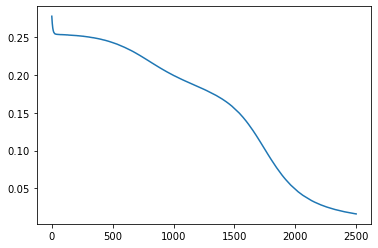

In [42]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## 중요!!!) 위의 경우에 있어서 optimizer의 lr을 수정을 하고, epoch등을 수정을 하면 xor의 결과가 안 나올 수 있음!!!!!!!!!!!!---> 적당한 값이 중요함!!! 이는 지금은 데이터가 없어서 발생을 함;;;


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

print (model.summary())
history = model.fit(x, y, epochs=300, batch_size=1)
model.predict(x)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3062
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3007
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2958


C:\Users\MEDICI\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2912
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2870
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2794
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2763
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2736
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2713
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2691
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 13/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2654
Epoch 14/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2640
Epoch 15/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2627
Epoch 16/300
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 1ms/step - loss: 0.2549
Epoch 108/300
4/4 [==============================] - 0s 999us/step - loss: 0.2547
Epoch 109/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2548
Epoch 110/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2547
Epoch 111/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2548
Epoch 112/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2547
Epoch 113/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2548
Epoch 114/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2548
Epoch 115/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2546
Epoch 116/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2548
Epoch 117/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2546
Epoch 118/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2547
Epoch 119/300
4/4 [========================

array([[0.5438998 ],
       [0.50051355],
       [0.5252931 ],
       [0.46410438]], dtype=float32)

# Regression : 전통적인 방식 기반

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

참고) tf에서 가지고 있는 데이터 셋들...
<img src="https://drive.google.com/uc?id=1j_JRhqnOS7rO9MIY0tuBMJTsRq87ei76">

<img src="https://drive.google.com/uc?id=1-Kc3346UPBgrLyUCkIy4SaL2SnUcdi97">

In [46]:
# 4.11 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [47]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [48]:
# 4.12 데이터 전처리(정규화)
# ---> 여기서는 학습 효율을 위해서 정규화 수행
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0]) 

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [49]:
from tensorflow.python.data.ops.optional_ops import Optional
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=52, activation="relu", input_shape=(13,)),
        tf.keras.layers.Dense(units=39, activation="relu"),
        tf.keras.layers.Dense(units=26, activation="relu"),
        tf.keras.layers.Dense(units=1)
])

# 설계한 건물의 loss, opt
model.compile(loss ="mse", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.07))

# 내가 설계한 모델의 요약설명!!!
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 52)                728       
                                                                 
 dense_7 (Dense)             (None, 39)                2067      
                                                                 
 dense_8 (Dense)             (None, 26)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.python.data.ops.optional_ops import Optional
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=52, activation="relu", input_shape=(13,)),
        tf.keras.layers.Dense(units=39, activation="relu"), # units 점점 줄여나감
        tf.keras.layers.Dense(units=26, activation="relu"),
        tf.keras.layers.Dense(units=1)
])

# 설계한 건물의 loss, opt
model.compile(loss ="mse", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.07))

# 내가 설계한 모델의 요약설명!!!
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 52)                728       
                                                                 
 dense_11 (Dense)            (None, 39)                2067      
                                                                 
 dense_12 (Dense)            (None, 26)                1040      
                                                                 
 dense_13 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


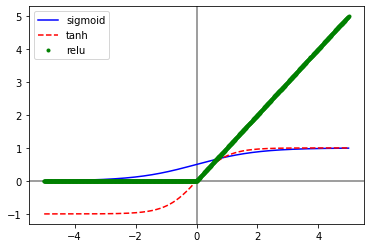

In [51]:
# 잠시 Activation Function에 대해서~~~
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [52]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 1.7534 - val_loss: 1.2783
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.8963 - val_loss: 1.1160
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7247 - val_loss: 1.2584
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7300 - val_loss: 1.0418
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6969 - val_loss: 1.2150
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6586 - val_loss: 1.1750
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7250 - val_loss: 1.0547
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6518 - val_loss: 1.1192
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6473 - val_loss: 1.0427
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6300 - val_loss: 1.0794
Epoch 11/25
10/10 

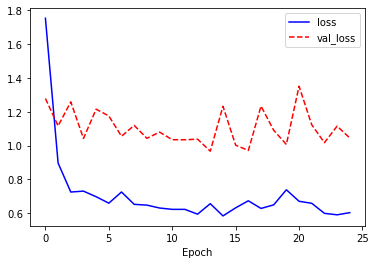

In [53]:
# 4.15 회귀 모델 학습 결과 시각화
# 해석 : 훈련 데이터의 에러는 줄어들지만...
#        검증 데이터의 에러는 줄어들지 않음;;;;ㅠㅠ
#        Overfit!!!!
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
# 4.16 회귀 모델 평가
# --> 엄청 나게 손실이 크다;;ㅠ
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.7088


0.7087677717208862

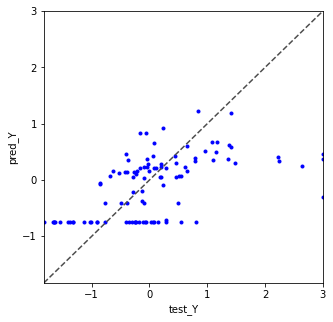

In [55]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

* 중요!!) 위의 경우에는 학습시 보다 검증에서 너무나 큰 오차가 발생을 하였기에 overfitting이 이루어졌을 것으로 판단이 됨.   
    - 이런 경우에 있어서 학습 도중에 끼어들기 위해서 callback함수를 사용한다. 
    - 콜백함수는 모델을 학습할 때 에포크가 끝날 때 마다 호출이 된다.
    - callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]
    - 여기서는 EarlyStopping으로 학습을 일찍 멈추는 기능으로, 
    - patiencce는 몇 번의 에포크를 기준으로 삼을 것인지,
    - monitor 은 어떤 값을 지켜볼 것인지에 대한 인수들!!!!
    - 즉, 아래 경우에 있어서는 : val_loss가 3회이 에포크를 수행을 하는 동안 최고 기록을 갱신하지 못한다면 학습을 중단하는 것!!!!

In [56]:
# 4.18 모델 재정의 및 학습
# --> 위의 overfit을 피하기 위해서 설계함...
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=52, activation="relu", input_shape=(13,)),
        tf.keras.layers.Dense(units=39, activation="relu"),
        tf.keras.layers.Dense(units=26, activation="relu"),
        tf.keras.layers.Dense(units=1)
])

# 설계한 건물의 loss, opt
model.compile(loss ="mse", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.07))

# callback에 patience 만큼 수행하는 동안 최고의 수치를 갱신하지 못하면 학습 종료!!!
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, 
                    validation_split=0.25, 
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 1.7648 - val_loss: 1.2371
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9146 - val_loss: 1.2826
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8757 - val_loss: 1.1280
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7548 - val_loss: 1.0938
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7160 - val_loss: 1.0900
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7046 - val_loss: 1.0677
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7039 - val_loss: 1.0980
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6559 - val_loss: 1.3696
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7117 - val_loss: 1.0595
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6411 - val_loss: 1.0344
Epoch 11

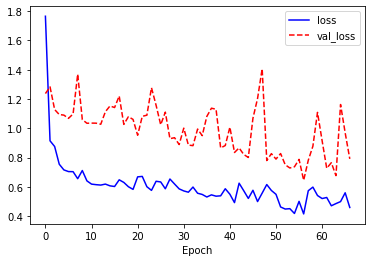

In [57]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [58]:
# 4.20 회귀 모델 평가
# ---> 위에서 보다 줄었다;;;
# 참고) 여기서는 seed를 고정하지 않았으니 편차는 존재!!!
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.5683


0.5682708024978638

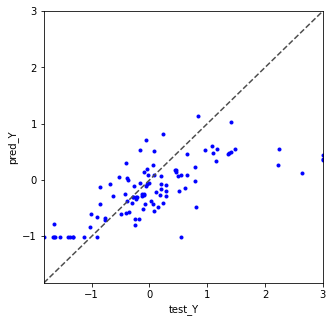

In [59]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

# Classification

* 참고)))이미지에 대한 분류는 뒤의 CNN에서 다루기로 하고 Pass --> 일반 데이터를 가지고 수행

# 5.1 이항 분류

In [60]:
import tensorflow as tf

In [61]:
tf.__version__

'2.8.0'

* 데이터 컬럼 설명    
<img src="https://drive.google.com/uc?id=1nPHdFRjtJOg7iBBPaSXYujiP7C5YzIeq">

In [63]:
# 5.1 와인 데이터셋 불러오기
# 데이터가 red, white 각기 존재함!!!
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [64]:
# 5.2 와인 데이터셋 합치기
# 정답지 : red = 0, white = 1
red["type"] = 0
white["type"] =1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

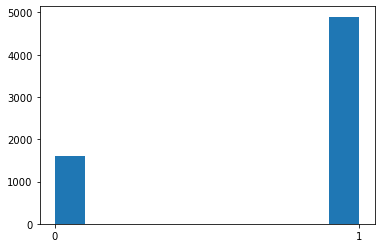

1    0.753886
0    0.246114
Name: type, dtype: float64


In [65]:
from locale import normalize
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
# --> 대략 분포가 red:white = 1:3 정도의 비율임!!!
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts(normalize=True))

<AxesSubplot:>

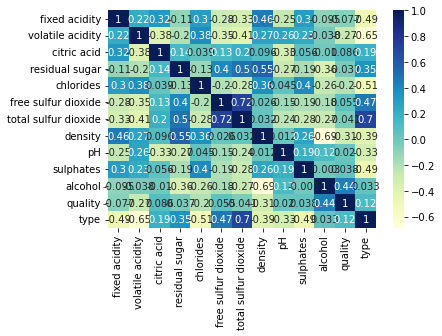

In [66]:
import seaborn as sns
correlations = wine[wine.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [67]:
# 5.4 데이터 요약 정보 확인
# --> 운이 좋게도 빵구난 데이터가 없음!!!!
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [68]:
# 5.5 데이터 정규화
# -> 학습의 안정성을 위해서 정규화 수행 : minMax Sclaer
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [69]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3543       0.181818          0.166667     0.120482        0.018405   0.036545   
2252       0.280992          0.140000     0.120482        0.108896   0.061462   
3448       0.239669          0.260000     0.174699        0.063650   0.041528   
1431       0.314050          0.233333     0.186747        0.023006   0.099668   
1307       0.247934          0.400000     0.054217        0.050613   0.098007   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3543             0.166667              0.352535  0.092346  0.534884   
2252             0.173611              0.387097  0.167920  0.341085   
3448             0.097222              0.294931  0.066512  0.441860   
1431             0.041667              0.156682  0.167534  0.418605   
1307             0.048611              0.052995  0.156738  0.534884   

      sulphates   alcohol   quality  type  
3543   0.174157  0.434783  0.500000   1.0 

* 참고) tf.keras.utils.to_categorical --> one hot encoding으로 변경을 해준다                                                    
아니면 아래와 같이 만들 수 있고, 아니면 scikit learn의 onehotencoding을 사용할 수 있음

In [70]:
# 직접 one_hot 구현 예시..
def labelMaker(val):     
    if val == 1:     
        return [1, 0, 0]     
    elif val == 2:     
        return [0, 1, 0]     
    else:      
        return [0, 0, 1]

아래 그림을 보면
   - 최종 출력단에 있어서 해당하는 카테고리에 대한 것을 표현을 해주기 위해서는 각기 종류별로 값을 나타내야 하고, 이에 대한 효율적인 표현이 바로 one-hot-encoding이기 때문에 이렇게 활용을 하여서 변형을 하는 것임!!!!!   
   - 그리고 "분류"의 문제이기 때문에 이에 대해서 최종 단에 있어서는  softmax를 활용해야 함!!!!!
   - 분류에 대한 기준이기 때문에 기준을 categorical_crossentropy로 설정을 함.

<img src="https://drive.google.com/uc?id=1smD9jnrEKhaACxvhuQmUgPNq3WHhT_wX">

In [71]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]


print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# one - hot - encoding으로 쉽게 변경 처리를 하자!!!!!!!
# --> 원하는 종류에 대해서 지정을 해야함!!!!
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0.18181818 0.16666667 0.12048193 0.01840491 0.03654485 0.16666667
 0.35253456 0.09234625 0.53488372 0.1741573  0.43478261 0.5       ]
1.0
[0.16528926 0.20333333 0.15060241 0.04754601 0.03654485 0.12847222
 0.26728111 0.08039329 0.37209302 0.23033708 0.46376812 0.5       ]
1.0
[0. 1.]
[0. 1.]


In [72]:
train_X.shape

(5197, 12)

In [73]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(input_shape = (12,), units = 48, activation = "relu"),
        tf.keras.layers.Dense(units = 24, activation = "relu"),
        tf.keras.layers.Dense(units = 12, activation = "relu"),
        
        # output layer -> 2진 분류 -> 노드수 고정! units = 2
        tf.keras.layers.Dense(units =2, activation = "softmax")
    ]
)
model.compile( loss = "categorical_crossentropy", 
               metrics = ["accuracy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.7)
             )


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 48)                624       
                                                                 
 dense_19 (Dense)            (None, 24)                1176      
                                                                 
 dense_20 (Dense)            (None, 12)                300       
                                                                 
 dense_21 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


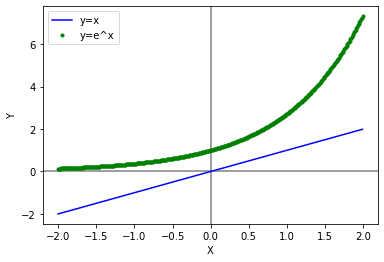

In [74]:
# 그림 5.5 출력 코드
# --> 아래 그림을 통해서 softmax 함수에서 분모에 exp를 사용하는 이유
# --> exp는 큰 값에 더 강조를 하게 되고, 작은 값은 더 약화시킴!!
# --> 이러한 부분을 바탕으로 확실하게 갈라주기 위해서 사용!!!
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [75]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 6.3312 - accuracy: 0.7421 - val_loss: 0.5639 - val_accuracy: 0.7692
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7480 - val_loss: 0.5415 - val_accuracy: 0.7692
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7480 - val_loss: 0.5628 - val_accuracy: 0.7692
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7480 - val_loss: 0.5519 - val_accuracy: 0.7692
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.7480 - val_loss: 0.6051 - val_accuracy: 0.7692
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.7480 - val_loss: 0.5673 - val_accuracy: 0.7692
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7480 - val_loss: 0.6074 - val_accuracy: 0.7692
Epoch 

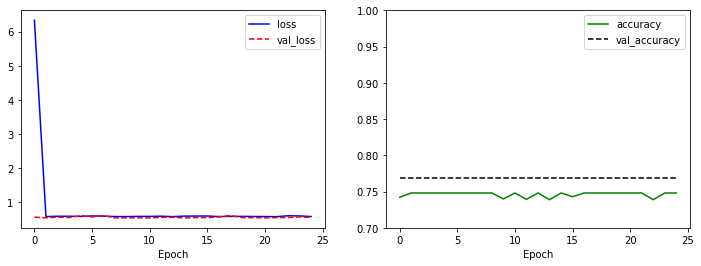

In [76]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [77]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 950us/step - loss: 0.5636 - accuracy: 0.7562


[0.563568651676178, 0.7561538219451904]

# 5.2 다항 분류 : category의 종류가 3개 이상인 경우

In [78]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


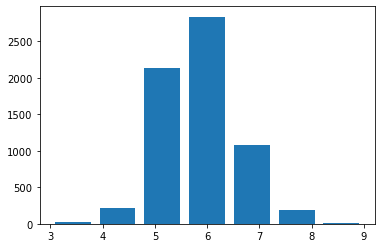

In [79]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [80]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
# wine["new_quality"] =0 
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [81]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]


train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [82]:
train_Y[0]

array([1., 0., 0.], dtype=float32)

In [83]:
train_X.shape

(5197, 12)

In [84]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model =model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(input_shape = (12,), units = 48, activation="relu"), 
     tf.keras.layers.Dense(units = 24, activation="relu"),
     tf.keras.layers.Dense(units =12, activation="relu"),

     # out layer --> 3진분류 --> 노드수!!!!!고정!! 3
     tf.keras.layers.Dense(units =3, activation = "softmax")
    ]
)
model.compile( loss = "categorical_crossentropy", 
               metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.07))

history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
122/122 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7906 - val_loss: 0.4197 - val_accuracy: 0.7954
Epoch 2/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7965 - val_loss: 0.4342 - val_accuracy: 0.7954
Epoch 3/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8004 - val_loss: 0.4098 - val_accuracy: 0.7954
Epoch 4/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.7945 - val_loss: 0.4057 - val_accuracy: 0.7954
Epoch 5/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.7991 - val_loss: 0.4421 - val_accuracy: 0.8146
Epoch 6/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.7957 - val_loss: 0.4060 - val_accuracy: 0.7954
Epoch 7/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.7919 - val_loss: 0.4306 - val_accuracy: 0.8054

Epoch 58/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8183 - val_loss: 0.3824 - val_accuracy: 0.8238
Epoch 59/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8196 - val_loss: 0.3897 - val_accuracy: 0.8123
Epoch 60/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8111 - val_loss: 0.4051 - val_accuracy: 0.7954
Epoch 61/100
122/122 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8096 - val_loss: 0.3854 - val_accuracy: 0.8223
Epoch 62/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8137 - val_loss: 0.3969 - val_accuracy: 0.8223
Epoch 63/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8199 - val_loss: 0.3863 - val_accuracy: 0.8323
Epoch 64/100
122/122 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8224 - val_loss: 0.4384 - val_accuracy:

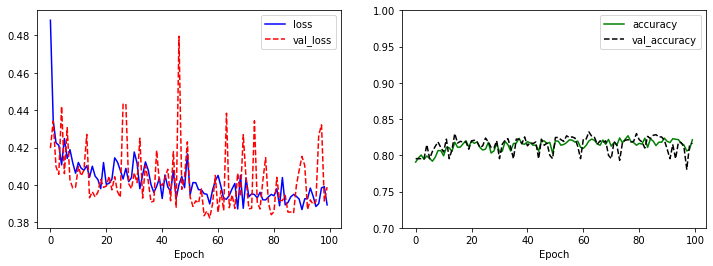

In [85]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [86]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 638us/step - loss: 0.3967 - accuracy: 0.8015


[0.3967196047306061, 0.8015384674072266]

# 5.3 Fashion MNIST

<img src="https://drive.google.com/uc?id=1_axH4QGvO9sH34AzX1TTvhi15k-e8eUJ">
<img src="https://drive.google.com/uc?id=16aESc_8JOYsgCLSrWy2A8XuTAExteYQ3">

In [87]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


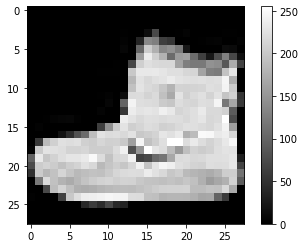

9


In [88]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [89]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [90]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    # ML했던 방식대로 DF로 꼭 만들어서 할 필요는 없다
    # 주어진 입력대로 받고,,내가 Flatten Layer 를 활용해서 피면된다
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 5.23 Fashion MNIST 분류 모델 학습
# 앞의 일반적인 데이터보다 특징의 수가 늘어나게 되어서 오래걸림.
history = model.fit(train_X, train_Y, epochs=50, validation_split=0.25)

Epoch 1/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5286 - accuracy: 0.8151 - val_loss: 0.4254 - val_accuracy: 0.8495
Epoch 2/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3904 - accuracy: 0.8603 - val_loss: 0.3841 - val_accuracy: 0.8591
Epoch 3/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3497 - accuracy: 0.8742 - val_loss: 0.3712 - val_accuracy: 0.8697
Epoch 4/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3249 - accuracy: 0.8816 - val_loss: 0.3414 - val_accuracy: 0.8779
Epoch 5/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3030 - accuracy: 0.8886 - val_loss: 0.3397 - val_accuracy: 0.8768
Epoch 6/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2898 - accuracy: 0.8932 - val_loss: 0.3335 - val_accuracy: 0.8797
Epoch 7/50
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.8985 - val_loss: 0.3571 - val_accuracy:

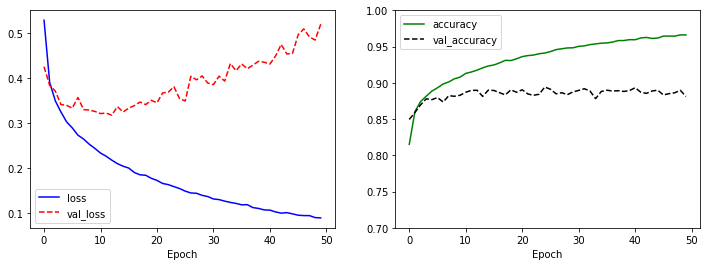

In [92]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [93]:
# 5.25 Fashion MNIST 분류 모델 평가
# ---> 뒤의 여러가지 방법들을 사용하면 더 높일 수 있음!!!
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 801us/step - loss: 0.5787 - accuracy: 0.8737


[0.5787303447723389, 0.8737000226974487]